In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster import hierarchy as sch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
airline=pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)

In [5]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
airline.shape

(3999, 12)

In [7]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [9]:
airline.rename(columns={'Award?':'Award','ID#':'ID'},inplace=True)

In [10]:
airline.head()


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Data Visualization

<Axes: ylabel='count'>

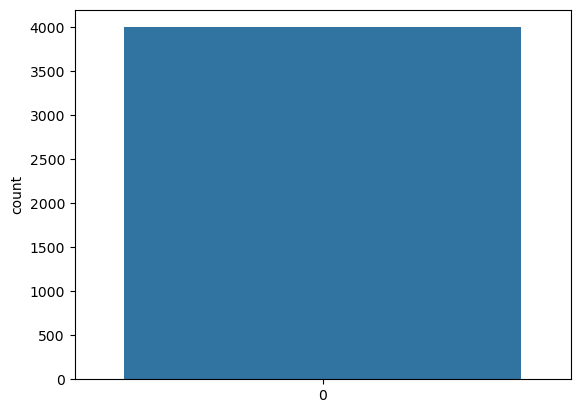

In [15]:
sns.countplot(airline['Award'])

<Axes: xlabel='Balance', ylabel='Count'>

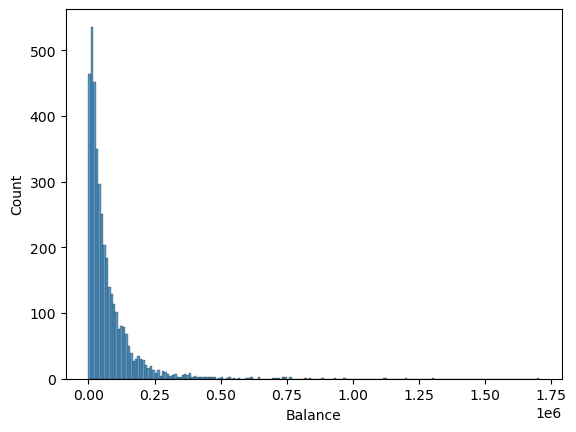

In [12]:
sns.histplot(airline['Balance'])


## Data Proccessing

In [16]:
data=airline.copy()

In [17]:
data.drop(columns='ID',axis=1,inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


## Normalization Function

In [18]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

## Normalized data frame (considering the numerical part of data)

In [19]:
df_norm = minmax_func(data.iloc[:,0:])

In [20]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Agglomerative Clustering
## create dendrogram

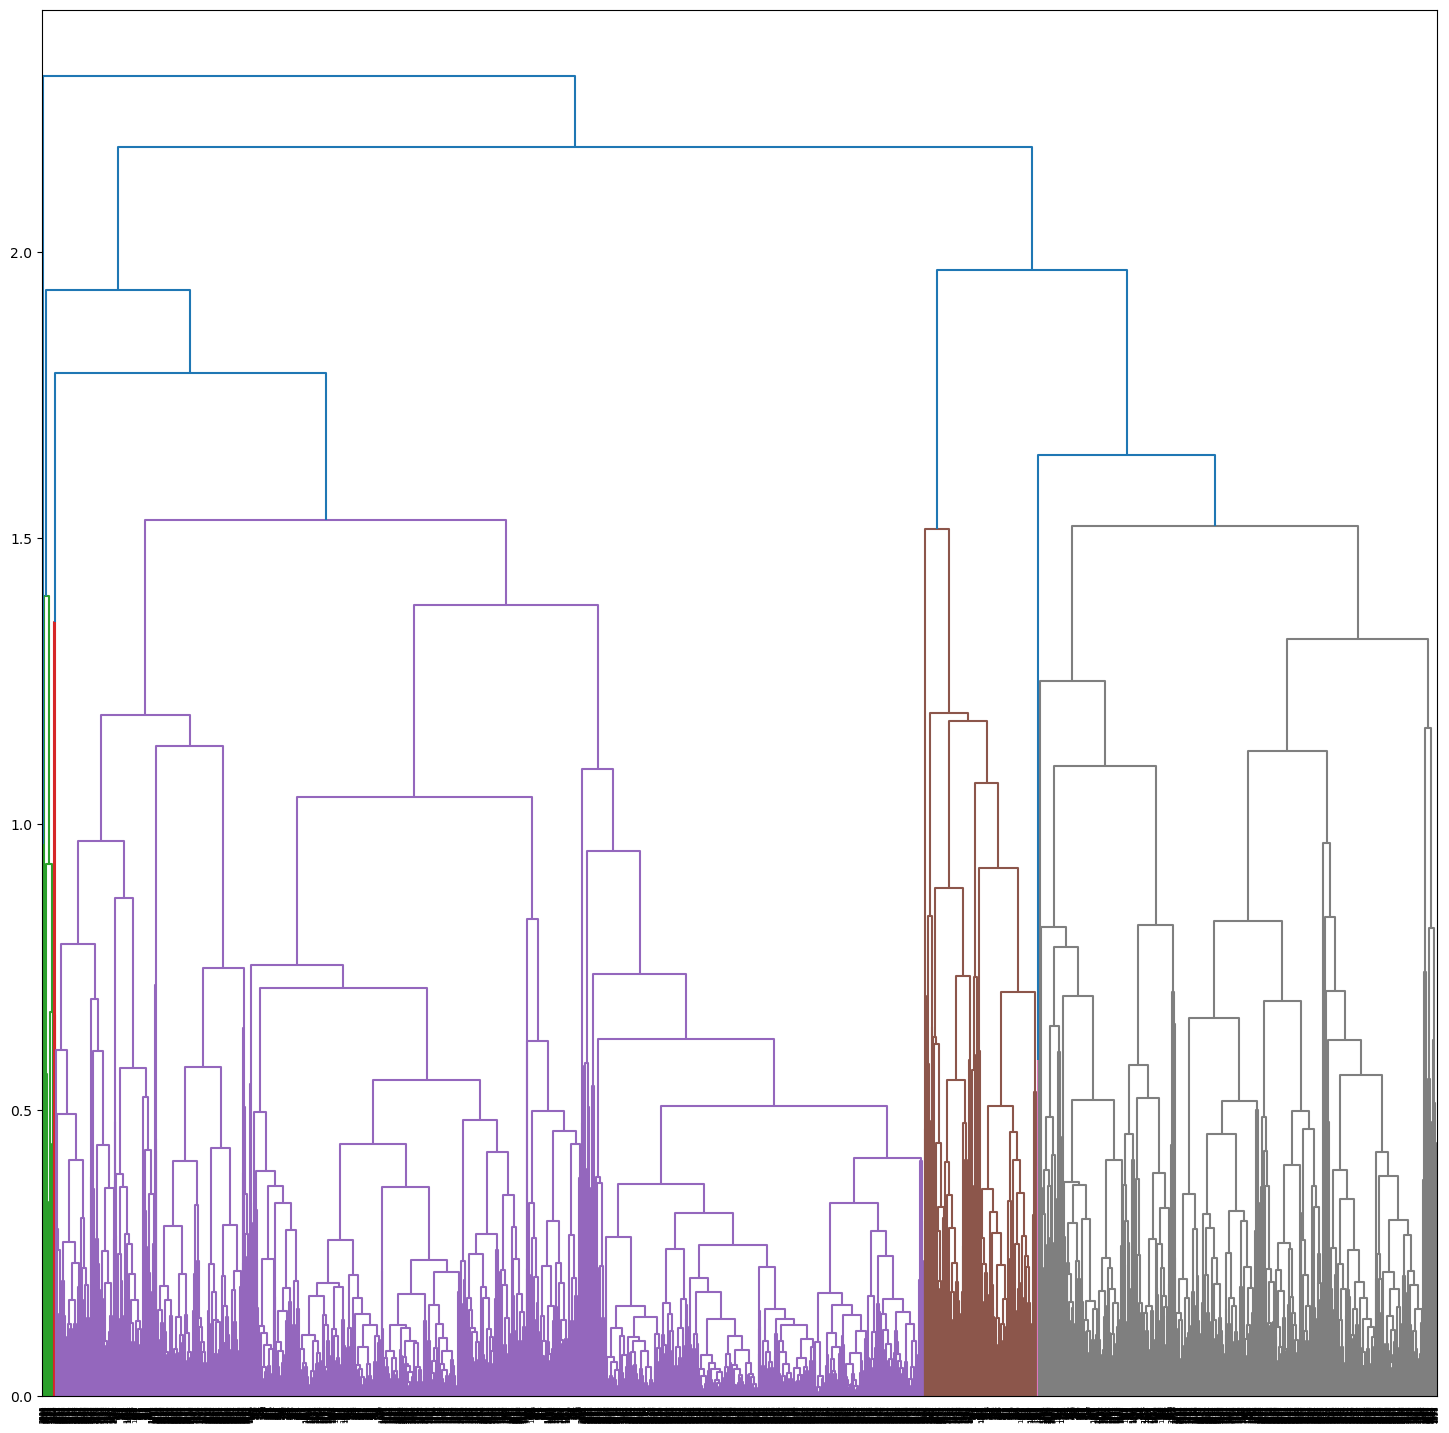

In [23]:
plt.figure(figsize=(18,18))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

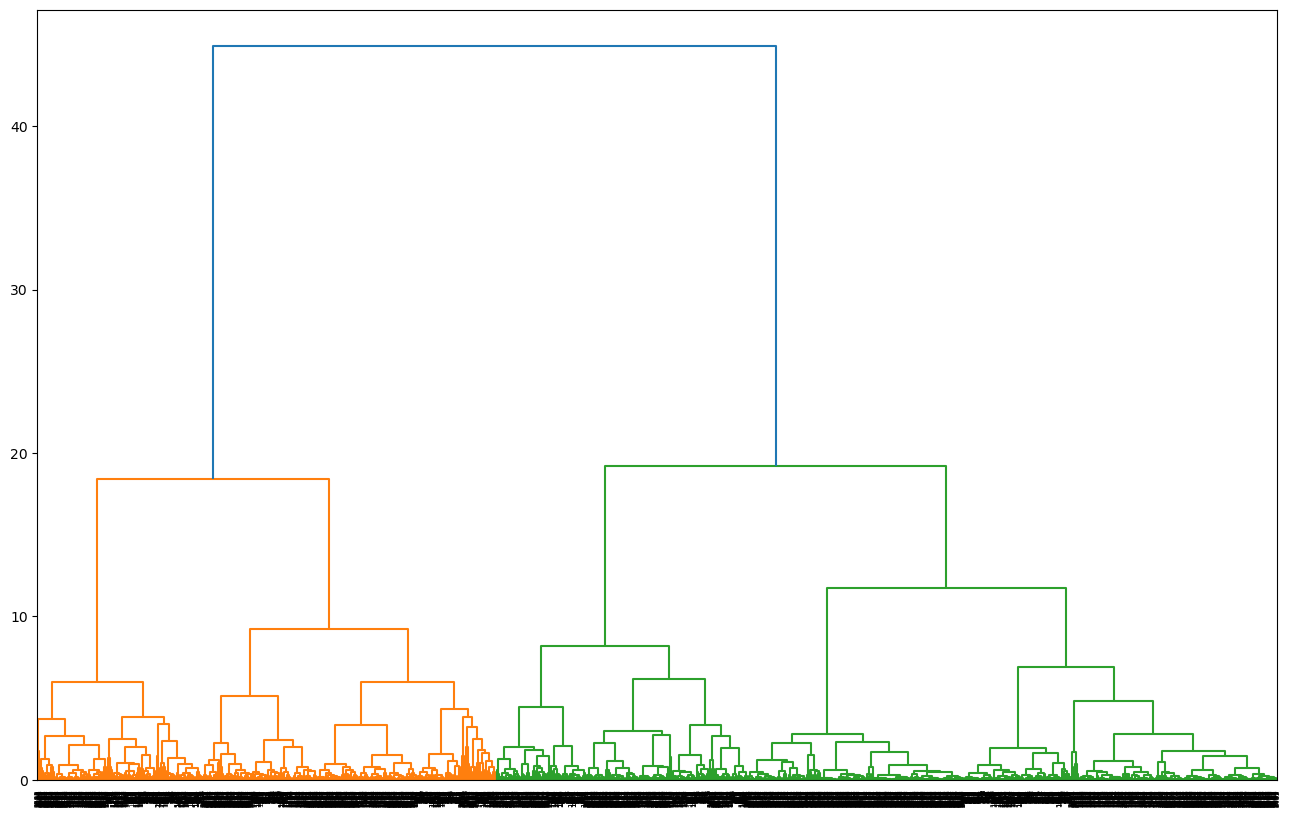

In [24]:
plt.figure(figsize=(16,10))
dngrm=sch.dendrogram(sch.linkage(df_norm,method='ward', metric='euclidean'))

In [25]:
agg=AgglomerativeClustering(n_clusters=2,linkage='single')
agg_data=agg.fit_predict(df_norm)
agg_data


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [26]:
agg_df=pd.DataFrame(agg_data)
agg_df


,0
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [27]:
airline['Clusters']=agg_df
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [28]:
agg_df.value_counts()

1    2518
0    1481
Name: count, dtype: int64

In [29]:
agg_0=airline[airline.Clusters==0]
agg_0


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [30]:
airline.groupby('Clusters').mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Clusters,,,,,,,,,,,,
0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


In [31]:
agg_1=airline[airline.Clusters==1]
agg_1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


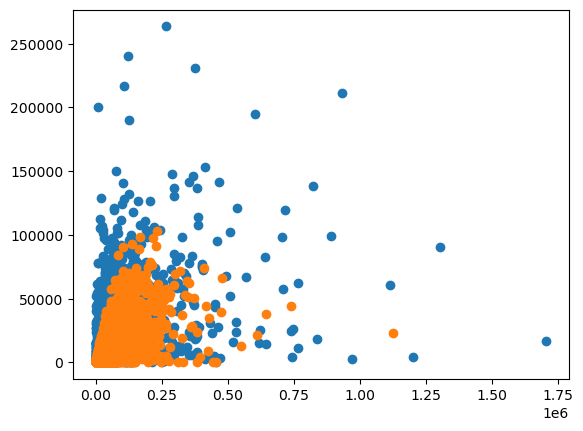

In [32]:
plt.scatter('Balance','Bonus_miles',data=agg_0)
plt.scatter('Balance','Bonus_miles',data=agg_1)

In [33]:
k_range=range(1,11)
SSE=[]
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_norm)
    SSE.append(kmeans.inertia_)

In [34]:
SSE

[1830.7932128584116,
 823.6756984125205,
 625.1768205797018,
 436.70885761932624,
 348.9433217254137,
 315.3155964842891,
 287.8951679905093,
 263.20453433202965,
 243.9155660366875,
 226.1084140060728]

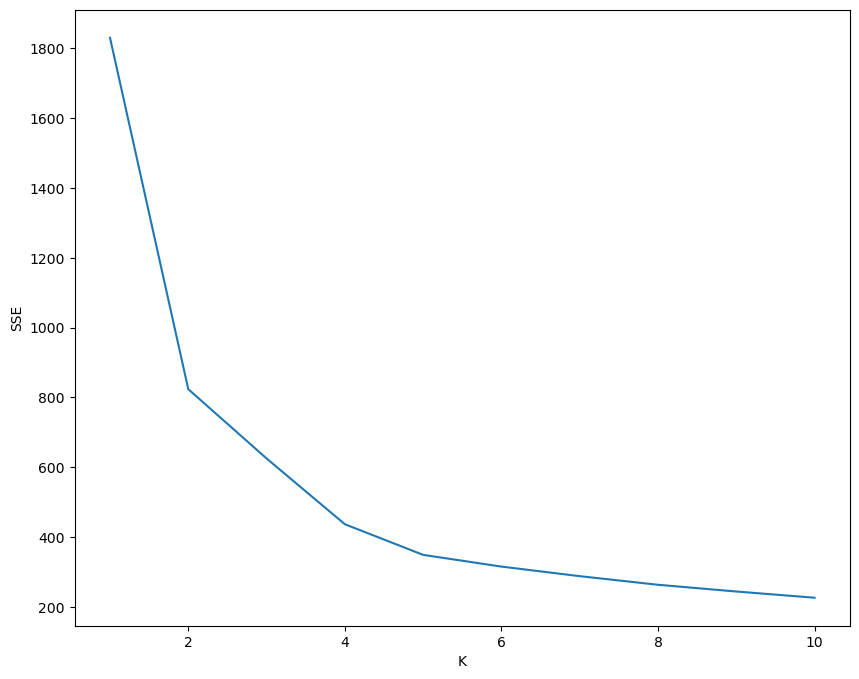

In [35]:
plt.figure(figsize=(10,8))
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_range,SSE)
plt.show()

## here the optimal kvalue is considered to be 4

In [36]:
KM_C=KMeans(n_clusters=4)
KM_DATA=KM_C.fit_predict(df_norm)
KM_DATA

array([1, 1, 1, ..., 2, 1, 1])

In [37]:
km_df=pd.DataFrame(KM_DATA)
km_df

,0
0,1
1,1
2,1
3,1
4,2
...,...
3994,0
3995,0
3996,2
3997,1


In [38]:
km_data=data.copy()

In [39]:
km_data['Clusters']=km_df
km_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [40]:
km_data['Clusters'].value_counts()

Clusters
1    1897
2     808
0     673
3     621
Name: count, dtype: int64

In [41]:
km_data_0=km_data[km_data.Clusters==0]
km_data_0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
17,13958,0,1,1,1,4291,5,0,0,6905,1,0
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
29,19221,0,1,1,1,4655,8,500,1,7896,1,0
36,23193,0,1,1,1,650,4,550,3,7861,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,10071,0,2,1,1,27701,16,0,0,1421,1,0
3987,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0


In [42]:
km_data_1=km_data[km_data.Clusters==1]
km_data_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,1
3992,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [43]:
km_data_2=km_data[km_data.Clusters==2]
km_data_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
8,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,28495,0,4,1,1,49442,15,0,0,6912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3931,49519,0,3,1,1,25762,18,0,0,1522,1,2
3954,33972,0,3,1,1,21029,29,0,0,1467,1,2
3973,72297,0,3,1,1,16241,16,0,0,1587,1,2
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,2


In [44]:
km_data_3=km_data[km_data.Clusters==3]
km_data_3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
6,84914,0,3,1,1,27482,25,0,0,6994,0,3
30,177926,0,3,1,1,20797,13,0,0,7886,0,3
32,276571,0,4,1,1,42044,23,0,0,7872,0,3
44,121260,0,3,1,1,18493,18,0,0,7808,0,3
56,75971,0,4,1,1,34339,14,0,0,6869,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,91605,0,4,1,1,37840,18,0,0,1444,0,3
3974,58387,0,3,1,1,14581,39,0,0,1435,0,3
3980,28867,0,3,1,1,19169,28,0,0,1425,0,3
3985,59017,0,4,1,1,34746,25,0,0,1418,0,3


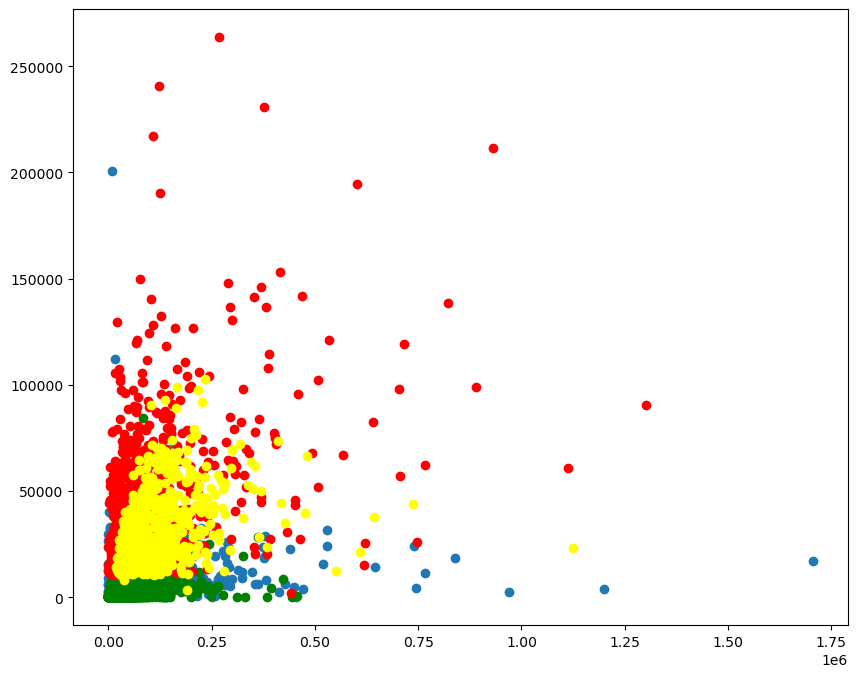

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(km_data_0["Balance"],km_data_0["Bonus_miles"])
plt.scatter(km_data_1["Balance"],km_data_1["Bonus_miles"],color="green")
plt.scatter(km_data_2["Balance"],km_data_2["Bonus_miles"],color="red")
plt.scatter(km_data_3["Balance"],km_data_3["Bonus_miles"],color="yellow")
plt.show()

## DBSCAN

In [46]:
DB_C=DBSCAN(eps=.5,min_samples=8)
DB_P=DB_C.fit_predict(df_norm)
DB_P

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
DB_DF=pd.DataFrame(DB_P)
DB_DF

,0
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [48]:
DB_DATA=data.copy()

In [49]:
DB_DATA['Clusters']=DB_DF

In [50]:
DB_DATA

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [51]:
DB_DATA.Clusters.value_counts()

Clusters
 0    2486
 1    1450
-1      28
 2      16
 4      10
 3       9
Name: count, dtype: int64

In [52]:
DB_N1=DB_DATA[DB_DATA.Clusters==-1]
DB_0=DB_DATA[DB_DATA.Clusters==0]
DB_1=DB_DATA[DB_DATA.Clusters==1]
DB_2=DB_DATA[DB_DATA.Clusters==2]
DB_3=DB_DATA[DB_DATA.Clusters==3]
DB_4=DB_DATA[DB_DATA.Clusters==4]

In [53]:
DB_N1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
198,8669,0,1,3,1,11397,16,0,0,7486,1,-1
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,-1
384,28193,0,5,1,4,103456,32,0,0,6980,1,-1


In [54]:
DB_0.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0


In [55]:
DB_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1


In [56]:
DB_2.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
794,55610,0,1,2,1,5095,13,0,0,6151,0,2
1149,84856,0,1,2,1,6894,13,0,0,5547,0,2
1389,49145,0,1,2,1,12755,22,2450,7,5323,0,2
1527,23965,0,1,2,1,7308,16,550,3,5003,0,2
1541,36887,0,1,2,1,9048,11,0,0,4951,0,2


In [57]:
DB_3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
381,167670,0,1,3,1,15907,13,0,0,6994,0,3
1270,16103,0,1,3,1,10819,13,0,0,5427,0,3
1791,32510,0,1,3,1,14568,13,0,0,4341,0,3
1918,52139,0,1,3,1,16314,14,250,1,3965,0,3
2278,30171,0,1,3,1,15370,13,0,0,3853,0,3


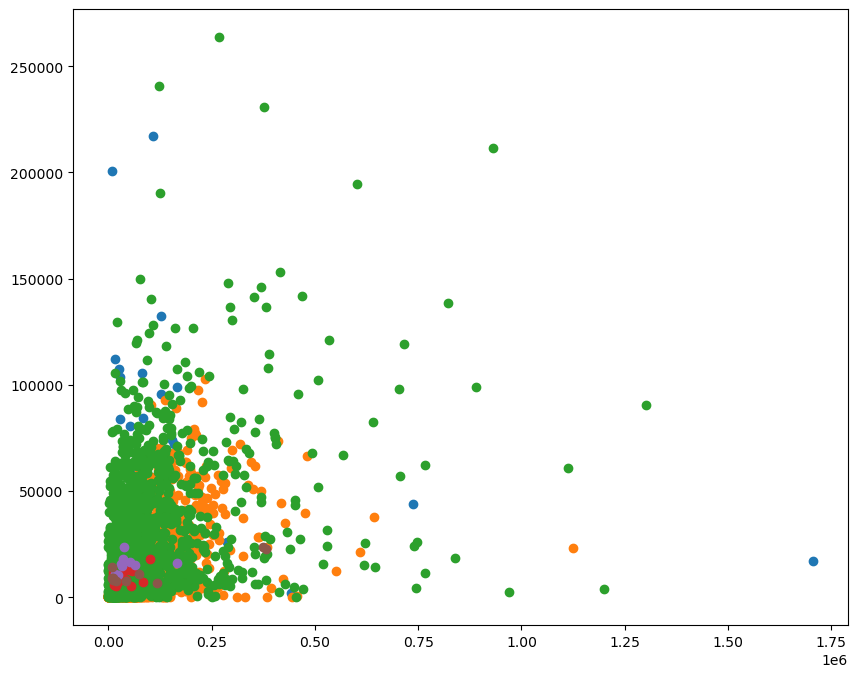

In [58]:
plt.figure(figsize=(10,8))
plt.scatter("Balance","Bonus_miles",data=DB_N1)
plt.scatter("Balance","Bonus_miles",data=DB_0)
plt.scatter("Balance","Bonus_miles",data=DB_1)
plt.scatter("Balance","Bonus_miles",data=DB_2)
plt.scatter("Balance","Bonus_miles",data=DB_3)
plt.scatter("Balance","Bonus_miles",data=DB_4)